In [5]:
import pandas as pd
import geopandas as gpd

world = gpd.read_file('./kml2geojson/mny.json')
world.head(5)
# files = pd.DataFrame(world)

# files.to_csv('test.csv', encoding='utf-8-sig')
# c1 = world[world['FCNAME'] == '刚果（金）']
# c1

,id,name,geometry
0,0322F28ACC321A934656,mny1,"POLYGON Z ((117.47137 23.71464 0.00000, 118.06..."
1,0352D59BBB321A957154,mny2,"POLYGON Z ((120.10548 23.70884 0.00000, 120.11..."
2,0184B02E4B321A97E8A8,mny3,"POLYGON Z ((76.41795 9.19940 0.00000, 76.67180..."


In [142]:
import pandas as pd
import geopandas as gpd

world = gpd.read_file('./worldmap4/world_transformed.json')
world.head(5)
files = pd.DataFrame(world)

files.to_csv('test_world.csv', encoding='utf-8-sig')

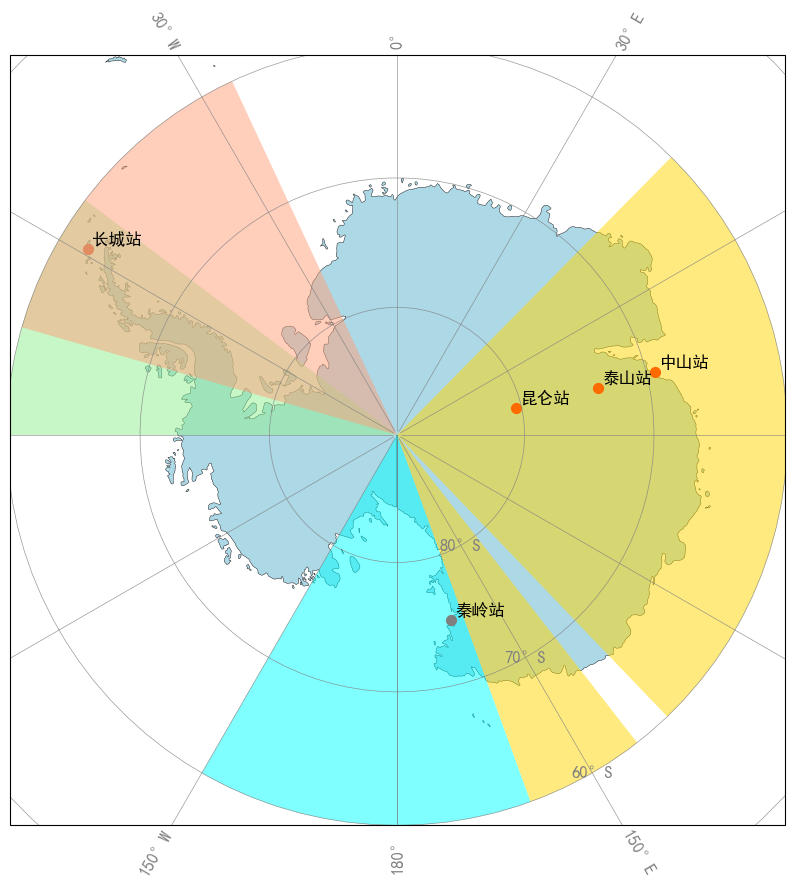

In [110]:
# 极地

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from shapely.geometry import Polygon
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 


def drawPie(lon_start, lon_end, lat_start, lat_end, color):
    lon_start = lon_start
    lon_end = lon_end
    lat_start = lat_start
    lat_end = lat_end

    num_points = 100
    angles = np.linspace(np.radians(lon_start), np.radians(lon_end), num_points)

    lons = []
    lats = []
    for angle in angles:
        lons.append(np.degrees(angle))
        lats.append(lat_start)

    lons = [lon_start] + lons + [lon_end]
    lats = [lat_end] + lats + [lat_end]

    ax.fill(lons, lats, color, alpha=0.5, transform=ccrs.PlateCarree())


# 读取地图数据
world = gpd.read_file('./physical/ne_50m_land.shp')
world = world.to_crs(ccrs.PlateCarree().proj4_init)

coords = [
    (163.7, -74.916667, '秦岭站'), 
    (76.974444, -73.863889, '泰山站'),
    (77.116111, -80.416944, '昆仑站'),
    (76.371652, -69.373587, '中山站'),
    (-58.961855, -62.216838, '长城站')
]
lons, lats, describes = zip(*coords)

# 创建绘图对象
fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# 绘制世界地图
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
ax.scatter(lons, lats, color='red', s=50, transform=ccrs.PlateCarree())
for lon, lat, des in coords:
    ax.annotate(des, (lon, lat), xytext=(3,3), textcoords='offset points', fontsize=12, color='black', transform=ccrs.PlateCarree())

#智利
drawPie(-90, -53, -60, -90, 'lightgreen')
#阿根廷
drawPie(-74, -25, -60, -90, 'lightsalmon')
#澳大利亚
drawPie(160, 142.033333, -60, -90, 'gold')
drawPie(136.183333, 44.633333, -60, -90, 'gold')
#新西兰
#澳大利亚
drawPie(160, 180, -60, -90, 'cyan')
drawPie(-150, -180, -60, -90, 'cyan')


gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.8, linestyle='-')
gl.xlocator = plt.MultipleLocator(30)
gl.ylocator = plt.MultipleLocator(10)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()


# 设置标签样式
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}


# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
# ax.gridlines()

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


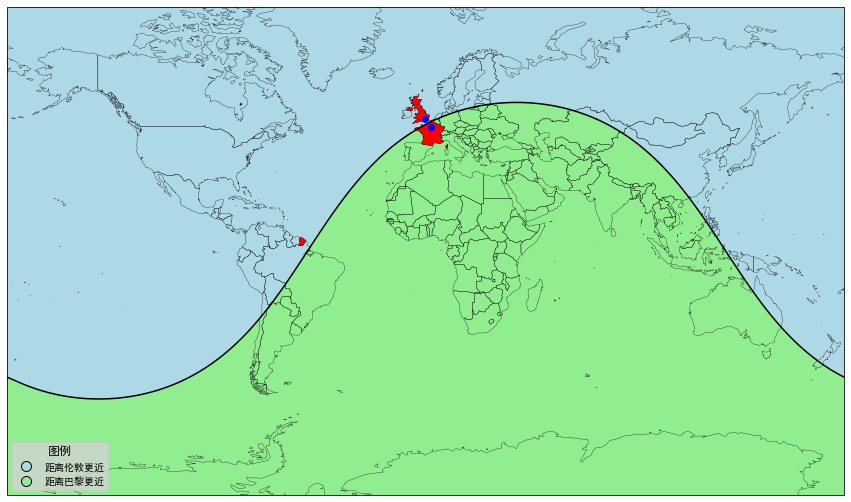

In [2]:
# 两点平分世界

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取地图数据
world = gpd.read_file('./worldmap4/world.json')

# 将地图数据转换为 Plate Carrée 投影
world = world.to_crs(ccrs.PlateCarree())

# 选取中国和澳大利亚的地理数据
c1 = world[world['name'] == '英国']
c2 = world[world['name'] == '法国']

# 创建绘图对象
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# 绘制世界地图
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


c1.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
c2.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

# 生成经纬度网格
lat1, lon1 = 51.50777890052945, -0.12601613293049535
lat2, lon2 = 48.857870088293815, 2.3510885557827286
lats = np.linspace(-90, 90, 300)
lons = np.linspace(-180, 180, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff = np.zeros(lon_grid.shape)

# 计算每个网格点到目标点的距离差
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        distance_diff[i, j] = d1 - d2

# 绘制轮廓线
contourf = ax.contourf(lon_grid, lat_grid, distance_diff, levels=[-1e10, 0, 1e10], colors=['lightblue', 'lightgreen'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, distance_diff, levels=[0], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离伦敦更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离巴黎更近', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')
# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output3.png', dpi=300, bbox_inches='tight')
plt.show()


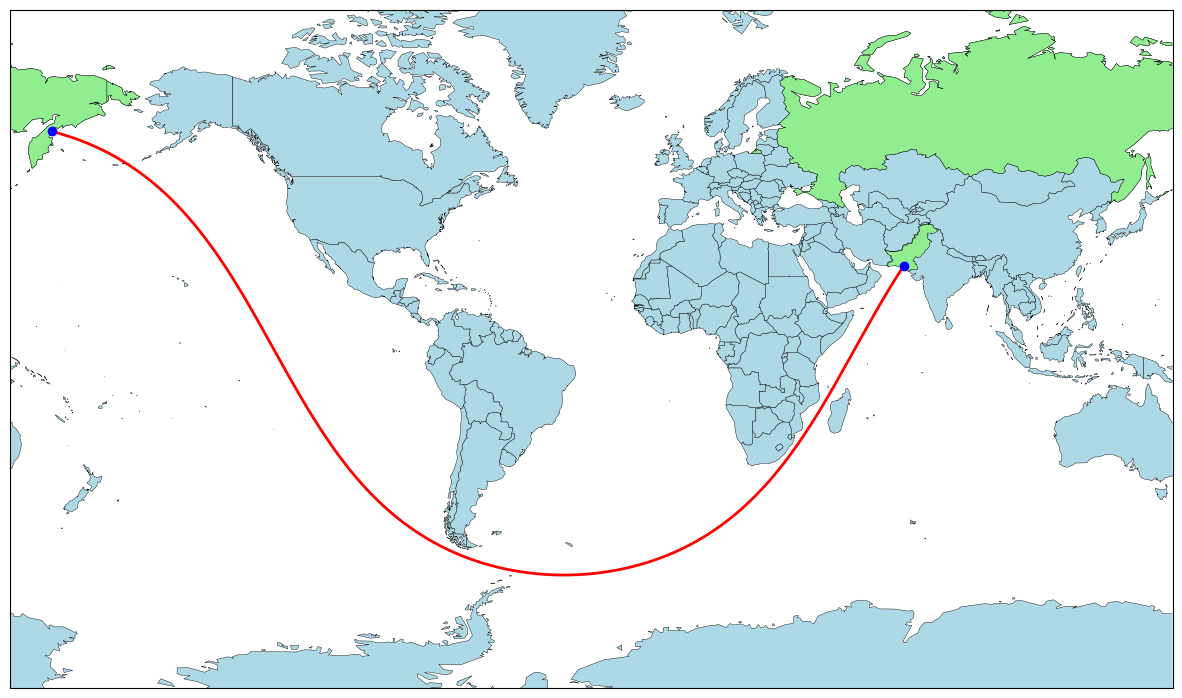

In [129]:
#最长海上直线
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyproj import Geod

# 读取世界地图数据
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())

# 提取俄罗斯和巴基斯坦的数据
c1 = world[world['name'] == '俄罗斯']
c2 = world[world['name'] == '巴基斯坦']

# prepare points
# P1
lat1, lon1 = 59.18232447782983, 162.90673502275226
# P1's antipode
lat1a = -lat1
lon1a = lon1 - 180
# p2
lat2, lon2 = 25.174689841781433, 66.75388912356865
# P2's antipode
lat2a = -lat2
lon2a = lon2 - 180


# 创建图形和投影
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=-30)})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
c1.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
c2.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

# 使用 pyproj 的 Geod 计算大圆弧线
geod = Geod(ellps="WGS84")

# Geodetic lines: P2-P1_antipode
num_points = 200
point1 = geod.npts(lon2, lat2, lon1a, lat1a, num_points)
# Geodetic lines: P1_antipode-P2_antipode
point2 = geod.npts(lon1a, lat1a, lon2a, lat2a, num_points)
# Geodetic lines: P2_antipode-P1
point3 = geod.npts(lon2a, lat2a, lon1, lat1, num_points)
points = point1 + point2 + point3

# 提取较长的一段路径
lons, lats = zip(*points)
# 绘制较长的大圆弧线
ax.plot(lons, lats, color='red', linewidth=2, transform=ccrs.Geodetic())

# 在地图上标记特定的经纬度点
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())

# 设置图形的外观和保存图像
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())
plt.savefig('outputN.png', dpi=300, bbox_inches='tight')
plt.show()


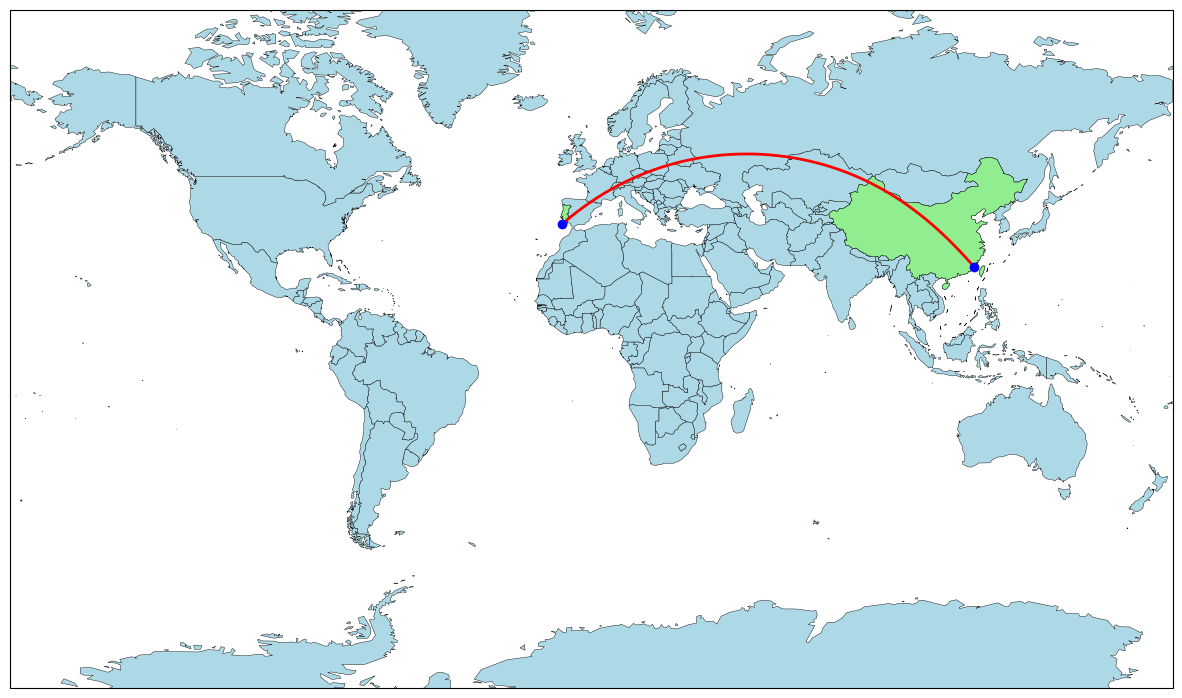

In [130]:
# 最长陆上直线
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyproj import Geod

# 读取世界地图数据
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())

# 提取俄罗斯和巴基斯坦的数据
c1 = world[world['name'] == '中国']
c2 = world[world['name'] == '葡萄牙']

# prepare points
# P1
lat1, lon1 = 24.854458453514578, 118.59559070701366
# P1's antipode
lat1a = -lat1
lon1a = lon1 - 180
# p2
lat2, lon2 = 37.01681965305515, -8.940346824854707
# P2's antipode
lat2a = -lat2
lon2a = lon2 - 180


# 创建图形和投影
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=0)})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
c1.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
c2.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

# 使用 pyproj 的 Geod 计算大圆弧线
geod = Geod(ellps="WGS84")

# Geodetic lines: P2-P1_antipode
num_points = 200
point = geod.npts(lon2, lat2, lon1, lat1, num_points)
# point1 = geod.npts(lon2, lat2, lon1a, lat1a, num_points)
# Geodetic lines: P1_antipode-P2_antipode
# point2 = geod.npts(lon1a, lat1a, lon2a, lat2a, num_points)
# Geodetic lines: P2_antipode-P1
# point3 = geod.npts(lon2a, lat2a, lon1, lat1, num_points)
# points = point1 + point2 + point3

# 提取较长的一段路径
lons, lats = zip(*point)
# 绘制较长的大圆弧线
ax.plot(lons, lats, color='red', linewidth=2, transform=ccrs.Geodetic())

# 在地图上标记特定的经纬度点
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())

# 设置图形的外观和保存图像
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())
plt.savefig('outputM.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# world.json文件求国家形状的对跖点
import json

# Load the GeoJSON file
file_path = './worldmap4/world_transformed.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Function to find a country's data and transform coordinates
def transform_country(data, country_name, new_country_name):
    for feature in data['features']:
        if feature['properties']['name'] == country_name:
            country = feature
            break
    else:
        return None  # Country not found

    # Transform the coordinates for the country
    def transform_coordinates(coords):
        return [[lon + 180, lat * -1] for lon, lat in coords]

    if country['geometry']['type'] == 'Polygon':
        new_coordinates = [transform_coordinates(ring) for ring in country['geometry']['coordinates']]
    elif country['geometry']['type'] == 'MultiPolygon':
        new_coordinates = [[transform_coordinates(ring) for ring in polygon] for polygon in country['geometry']['coordinates']]

    # Create a new feature for the transformed country
    country_transformed = {
        "type": "Feature",
        "properties": {
            "name": new_country_name,
            "full_name": country['properties'].get('full_name', ''),
            "iso_a2": country['properties'].get('iso_a2', ''),
            "iso_a3": country['properties'].get('iso_a3', ''),
            "iso_n3": country['properties'].get('iso_n3', '')
        },
        "geometry": {
            "type": country['geometry']['type'],
            "coordinates": new_coordinates
        }
    }

    # Add the new feature to the GeoJSON data
    data['features'].append(country_transformed)
    return data

# Transform Chile and add the new record as "智利对"
data = transform_country(data, '智利', '智利对')

# Save the new GeoJSON data to a file
output_path_chile = './worldmap4/world_transformed_chile.json'
with open(output_path_chile, 'w', encoding='utf-8') as output_file:
    json.dump(data, output_file, ensure_ascii=False)



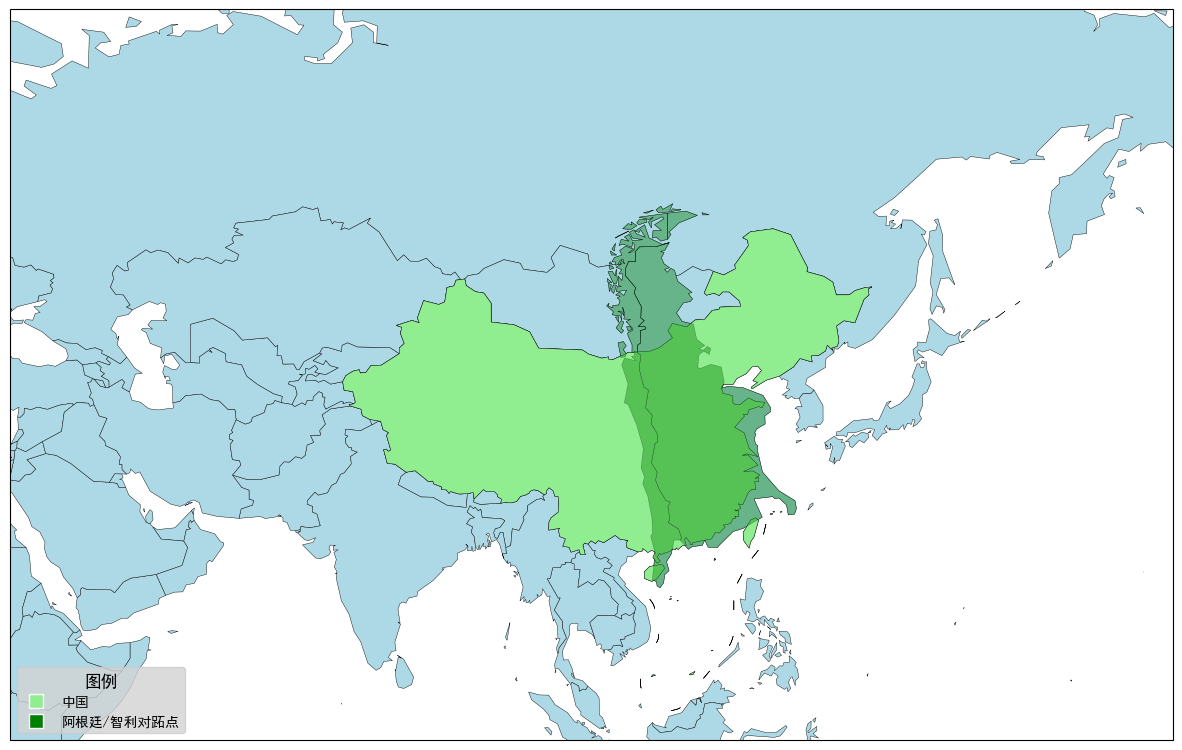

In [153]:
#阿根廷对跖点
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world_antipode.json')

world = world.to_crs(ccrs.PlateCarree())

countries_to_fill1 = ['中国']

countries_to_fill2 = ['阿根廷对', '智利对']
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})

world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill1:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill2:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='green', edgecolor='black', linewidth=0.3, alpha=0.4, transform=ccrs.PlateCarree())



legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='lightgreen', markersize=10, label='中国', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, label='阿根廷/智利对跖点', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')


ax.tick_params(axis='both', which='both', length=0, labelsize=0)

ax.set_extent([35, 170, 70, 0], crs=ccrs.PlateCarree())


plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()

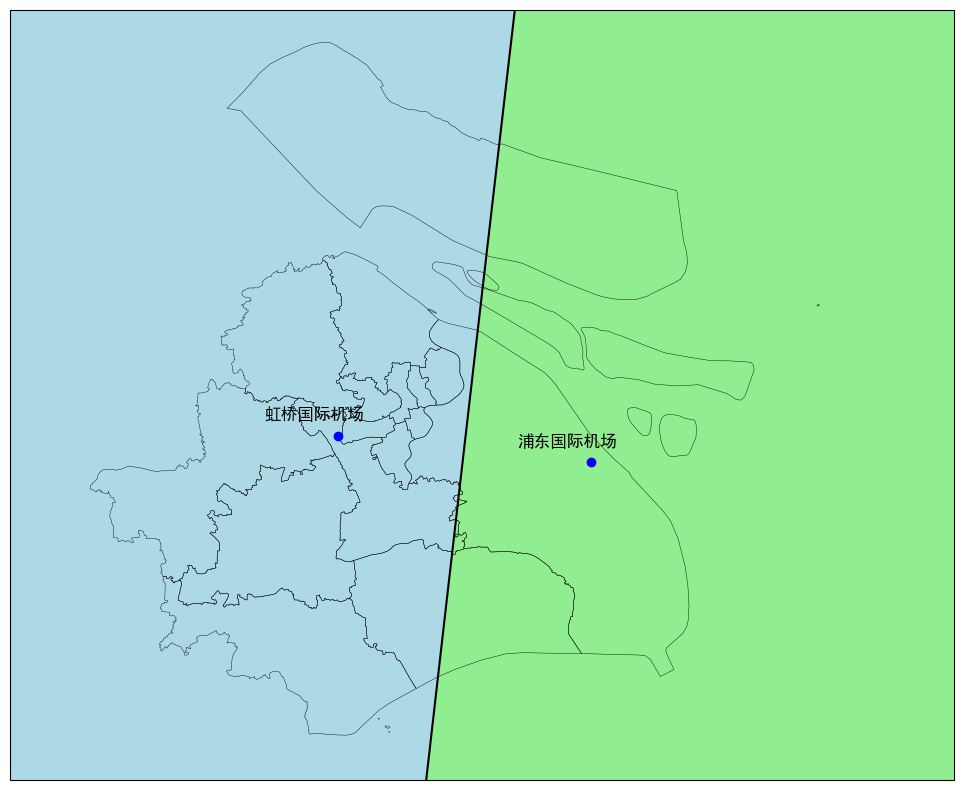

In [10]:
#机场-大比例尺
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from geopy.distance import geodesic
import numpy as np

# data prepare
# 双流/天府
# lat1, lon1, name1 = 30.569778839864615, 103.95590312791185, '双流国际机场'
# lat2, lon2, name2 = 30.313116323266186, 104.44369225050900, '天府国际机场'
# scale = [102.8, 105, 29.93, 31.53]
# 首都/大兴
# lat1, lon1, name1 = 40.081054085660170, 116.60289618916025, '首都国际机场'
# lat2, lon2, name2 = 39.510088104671800, 116.41055148830489, '大兴国际机场'
# scale = [115, 118, 39.3, 41.3]
# 虹桥/浦东
# lat1, lon1, name1 = 31.196370406678966, 121.32436104784608, '虹桥国际机场'
# lat2, lon2, name2 = 31.151172974190693, 121.80677677203800, '浦东国际机场'
# scale = [120.7, 122.5, 30.6, 31.93]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

chengdu = gpd.read_file('./chinamap/shanghai.json')
chengdu = chengdu.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

# P1
lat1, lon1, name1 = 31.196370406678966, 121.32436104784608, '虹桥国际机场'
# P2
lat2, lon2, name2 = 31.151172974190693, 121.80677677203800, '浦东国际机场'
# lon lat scale list
scale = [120.7, 122.5, 30.6, 31.93]

# calculate half devided line
lats = np.linspace(scale[2], scale[3], 300)
lons = np.linspace(scale[0], scale[1], 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff = np.zeros(lon_grid.shape)

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        distance_diff[i, j] = d1 - d2

contourf = ax.contourf(lon_grid, lat_grid, distance_diff, levels=[-1e10, 0, 1e10], colors=['lightblue', 'lightgreen'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, distance_diff, levels=[0], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())

ax.text(lon1+0.05, lat1+0.05, name1, transform=ccrs.PlateCarree(), fontsize=12, ha='right', va='top', zorder=10)
ax.text(lon2+0.05, lat2+0.05, name2, transform=ccrs.PlateCarree(), fontsize=12, ha='right', va='top', zorder=10)


# draw map
chengdu.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent(scale, crs=ccrs.PlateCarree())

# save and show
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


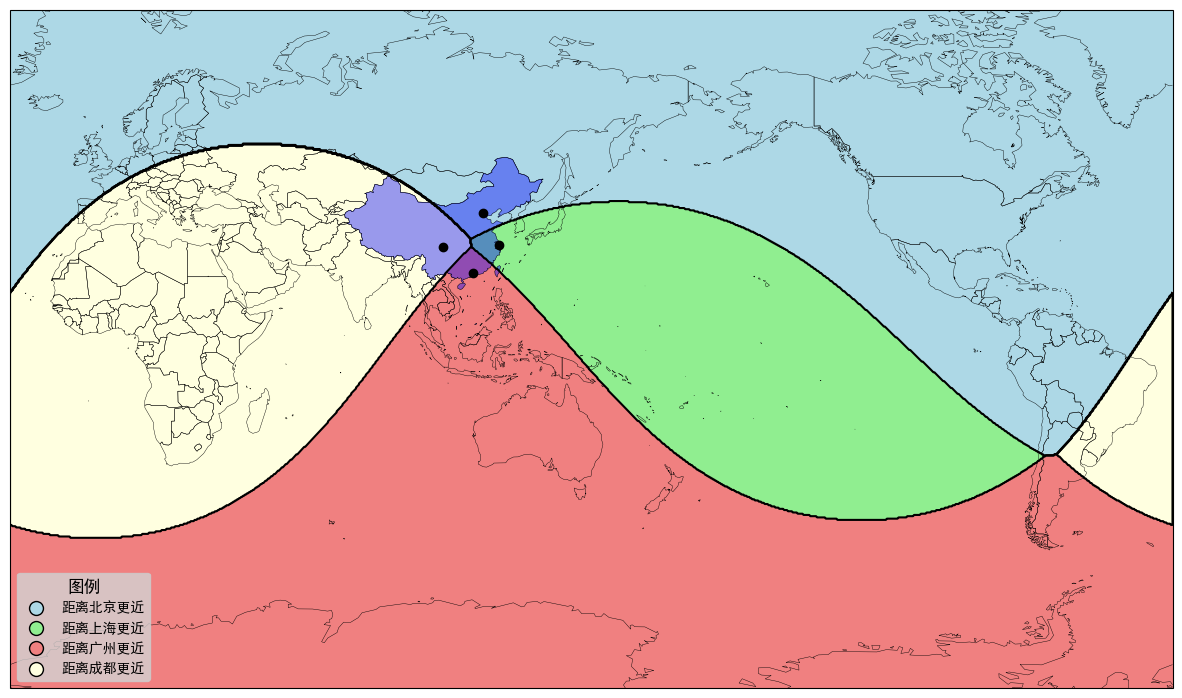

In [22]:
# 离你最近的四个城市
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
# 读取地图数据
world = gpd.read_file('./worldmap4/world.json')

# 将地图数据转换为 Plate Carrée 投影
world = world.to_crs(ccrs.PlateCarree())

# 选取英国、法国和德国的地理数据
c1 = world[world['name'] == '中国']
# c2 = world[world['name'] == '法国']
# c3 = world[world['name'] == '德国']

# 创建绘图对象
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})

# 绘制世界地图
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

# 绘制三个国家
c1.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.3, alpha=0.4, transform=ccrs.PlateCarree())
# c2.plot(ax=ax, color='green', edgecolor='black', linewidth=0.3, alpha=0.4, transform=ccrs.PlateCarree())
# c3.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, alpha=0.4, transform=ccrs.PlateCarree())

# 生成经纬度网格
# lat1, lon1 = 51.50777890052945, -0.12601613293049535  # 伦敦
# lat2, lon2 = 48.857870088293815, 2.3510885557827286   # 巴黎
# lat3, lon3 = 52.519704540110595, 13.407949812341089   # 柏林
lat1, lon1 = 39.90407922493942, 116.3912490206096   # 北京
lat2, lon2 = 31.240256554284514, 121.49840283827895   # 上海
lat3, lon3 = 23.122773037588736, 113.26168014603358   # 广州
lat4, lon4 = 30.658847978781502, 104.06595526381238   # 成都
# lat1, lon1 = 47.609251331603694, -122.33314182466982   # 西雅图
# lat2, lon2 = 42.358255079767990, -71.054566476430380   # 波士顿
# lat3, lon3 = 25.761618408727980, -80.195219885820720   # 迈阿密
# lat4, lon4 = 21.311592704789668, -157.85844146832410   # 檀香山
# lat1, lon1 = 23.399352521949837, 113.30038286405006   # 白云机场
# lat2, lon2 = 22.632993696792287, 113.80534005514157   # 宝安机场
# lat3, lon3 = 22.315490584010796, 113.93473527373236   # 香港机场
# lat4, lon4 = 22.157835356531564, 113.57493379683791   # 澳门机场
lats = np.linspace(-90, 90, 600)
lons = np.linspace(-180, 180, 1200)
lon_grid, lat_grid = np.meshgrid(lons, lats)
nearest_city = np.zeros(lon_grid.shape)

# 计算每个网格点到三个目标点的距离
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        d3 = geodesic(point, (lat3, lon3)).kilometers
        d4 = geodesic(point, (lat4, lon4)).kilometers
        distances = [d1, d2, d3, d4]
        nearest_city[i, j] = np.argmin(distances)

# 绘制不同区域
contourf = ax.contourf(lon_grid, lat_grid, nearest_city, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, nearest_city, levels=[0.5, 1.5, 2.5], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2, lon3, lon4], [lat1, lat2, lat3, lat4], color='black', marker='o', zorder=5, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离北京更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离上海更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightcoral', markersize=10, label='距离广州更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightyellow', markersize=10, label='距离成都更近', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')

# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output3_cities.png', dpi=300, bbox_inches='tight')
plt.show()


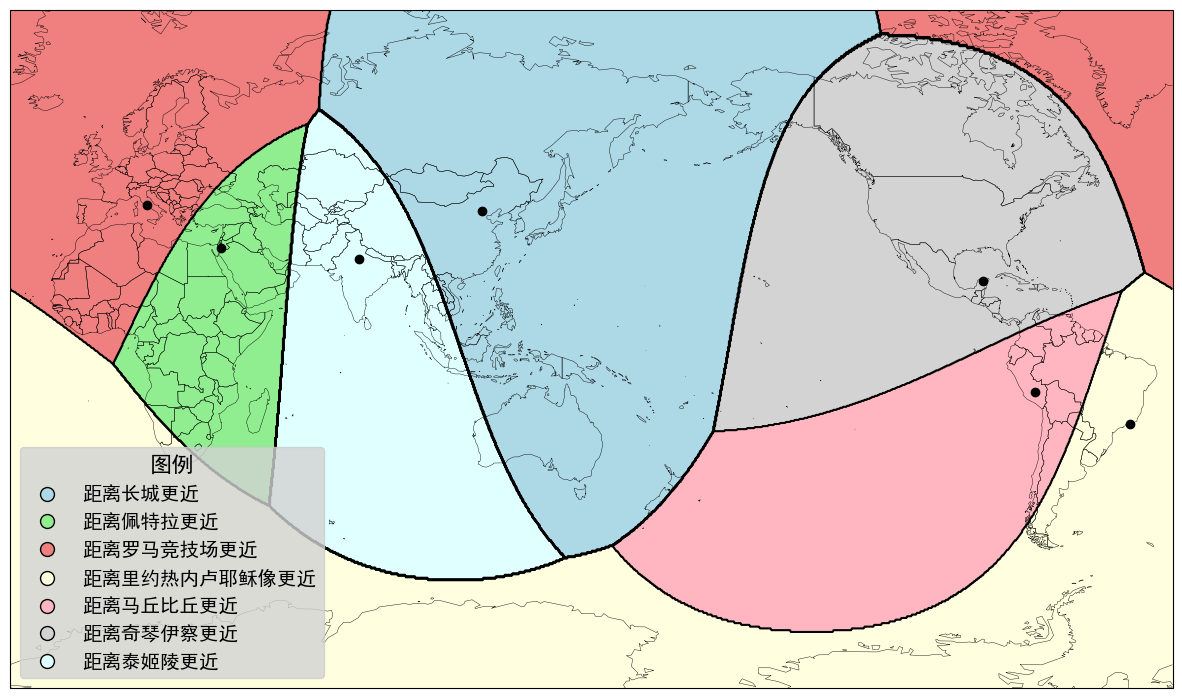

In [2]:
# 世界新七大奇迹
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


# 生成7个城市的经纬度
lat1, lon1 = 40.36138130698161, 116.02067023326721   # 长城（八达岭）
lat2, lon2 = 30.328494847322816, 35.44435951613219   # 佩特拉
lat3, lon3 = 41.89038588093076, 12.492252354772056   # 罗马竞技场
lat4, lon4 = -22.95184656802583, -43.21045182648534   # 里约热内卢耶稣像
lat5, lon5 = -13.11924716057777, -72.53054289794382   # 马丘比丘
lat6, lon6 = 20.684445476959457, -88.56781479009037   # 奇琴伊察
lat7, lon7 = 27.175364300340416, 78.04217438308545    # 泰姬陵

# 将城市经纬度存入列表
cities = [(lat1, lon1), (lat2, lon2), (lat3, lon3), (lat4, lon4), (lat5, lon5), (lat6, lon6), (lat7, lon7)]

lats = np.linspace(-90, 90, 600)
lons = np.linspace(-180, 180, 1200)
lon_grid, lat_grid = np.meshgrid(lons, lats)
nearest_city = np.zeros(lon_grid.shape)

# 计算每个网格点到7个目标点的距离
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        distances = [geodesic(point, city).kilometers for city in cities]
        nearest_city[i, j] = np.argmin(distances)

# 绘制不同区域
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray', 'lightcyan']
contourf = ax.contourf(lon_grid, lat_grid, nearest_city, levels=np.arange(-0.5, 7, 1), colors=colors, transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, nearest_city, levels=np.arange(0.5, 6.5, 1), colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2, lon3, lon4, lon5, lon6, lon7], [lat1, lat2, lat3, lat4, lat5, lat6, lat7], color='black', marker='o', zorder=5, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离长城更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离佩特拉更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightcoral', markersize=10, label='距离罗马竞技场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightyellow', markersize=10, label='距离里约热内卢耶稣像更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightpink', markersize=10, label='距离马丘比丘更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgray', markersize=10, label='距离奇琴伊察更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightcyan', markersize=10, label='距离泰姬陵更近', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output7_cities.png', dpi=300, bbox_inches='tight')
plt.show()


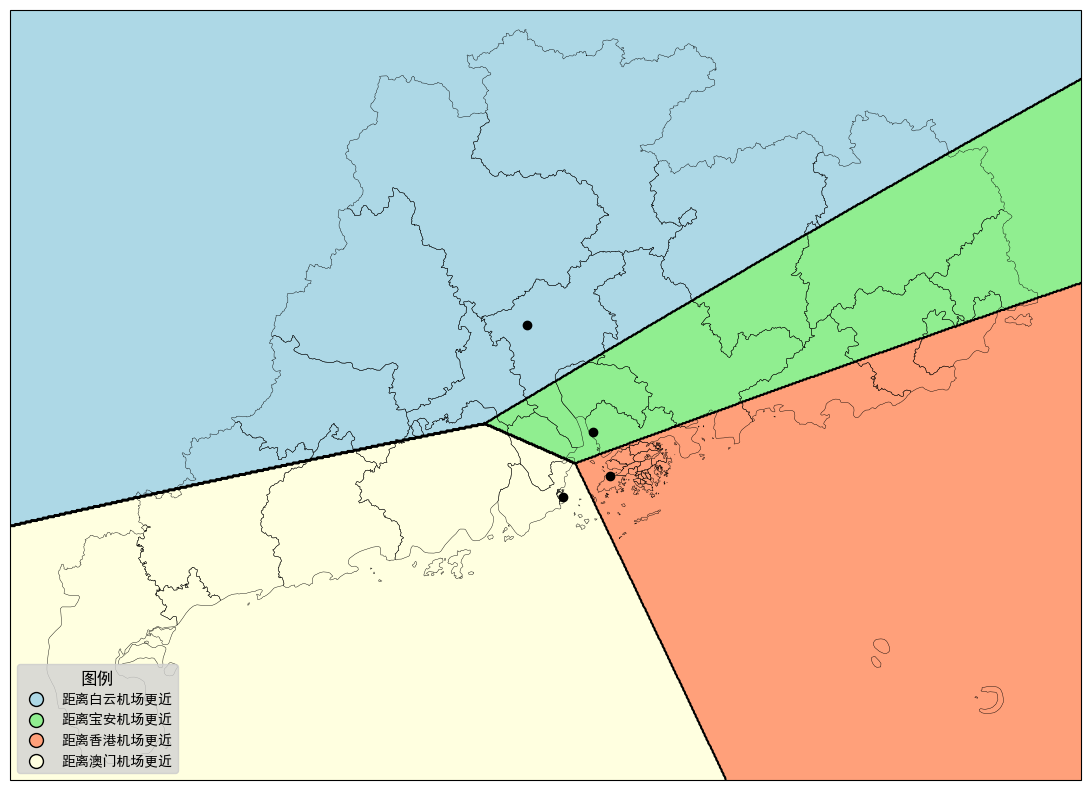

In [5]:
#珠三角四个机场
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

guangdong = gpd.read_file('./chinamap/guangdong.json')
hongkong = gpd.read_file('./chinamap/hongkong.json')
macao = gpd.read_file('./chinamap/macao.json')

guangdong = guangdong.to_crs(ccrs.PlateCarree())
hongkong = hongkong.to_crs(ccrs.PlateCarree())
macao = macao.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

guangdong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
hongkong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
macao.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

lat1, lon1 = 23.399352521949837, 113.30038286405006   # 白云机场
lat2, lon2 = 22.632993696792287, 113.80534005514157   # 宝安机场
lat3, lon3 = 22.315490584010796, 113.93473527373236   # 香港机场
lat4, lon4 = 22.157835356531564, 113.57493379683791   # 澳门机场
lats = np.linspace(20.10, 25.66, 600)
lons = np.linspace(109.37, 117.52, 1200)
lon_grid, lat_grid = np.meshgrid(lons, lats)
nearest_city = np.zeros(lon_grid.shape)

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        d3 = geodesic(point, (lat3, lon3)).kilometers
        d4 = geodesic(point, (lat4, lon4)).kilometers
        distances = [d1, d2, d3, d4]
        nearest_city[i, j] = np.argmin(distances)

contourf = ax.contourf(lon_grid, lat_grid, nearest_city, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, nearest_city, levels=[0.5, 1.5, 2.5], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2, lon3, lon4], [lat1, lat2, lat3, lat4], color='black', marker='o', zorder=5, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离白云机场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离宝安机场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightcoral', markersize=10, label='距离香港机场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightyellow', markersize=10, label='距离澳门机场更近', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 保存图像并显示
plt.savefig('output10.png', dpi=300, bbox_inches='tight')
plt.show()


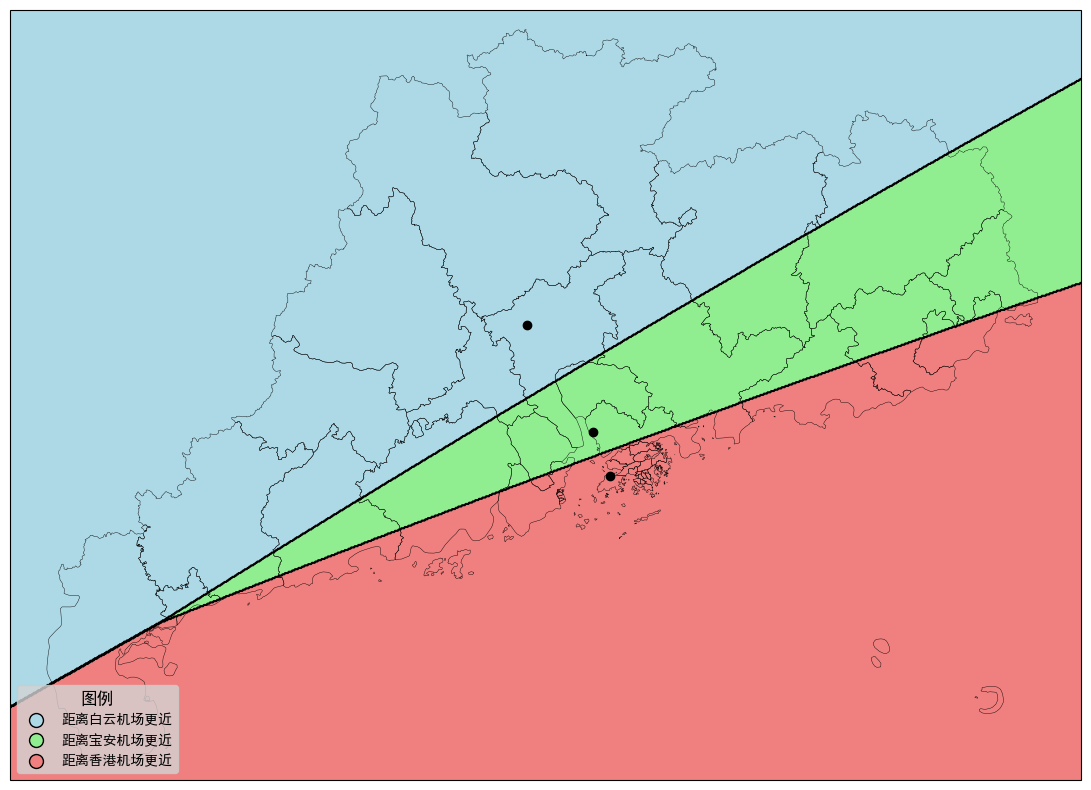

In [9]:
#珠三角三个机场
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

guangdong = gpd.read_file('./chinamap/guangdong.json')
hongkong = gpd.read_file('./chinamap/hongkong.json')
macao = gpd.read_file('./chinamap/macao.json')

guangdong = guangdong.to_crs(ccrs.PlateCarree())
hongkong = hongkong.to_crs(ccrs.PlateCarree())
macao = macao.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

guangdong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
hongkong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
macao.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

lat1, lon1 = 23.399352521949837, 113.30038286405006   # 白云机场
lat2, lon2 = 22.632993696792287, 113.80534005514157   # 宝安机场
lat3, lon3 = 22.315490584010796, 113.93473527373236   # 香港机场
lats = np.linspace(20.10, 25.66, 600)
lons = np.linspace(109.37, 117.52, 1200)
lon_grid, lat_grid = np.meshgrid(lons, lats)
nearest_city = np.zeros(lon_grid.shape)

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        d3 = geodesic(point, (lat3, lon3)).kilometers
        distances = [d1, d2, d3]
        nearest_city[i, j] = np.argmin(distances)

contourf = ax.contourf(lon_grid, lat_grid, nearest_city, levels=[-0.5, 0.5, 1.5, 2.5], colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, nearest_city, levels=[0.5, 1.5], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2, lon3], [lat1, lat2, lat3], color='black', marker='o', zorder=5, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离白云机场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离宝安机场更近', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightcoral', markersize=10, label='距离香港机场更近', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 保存图像并显示
plt.savefig('output10.png', dpi=300, bbox_inches='tight')
plt.show()


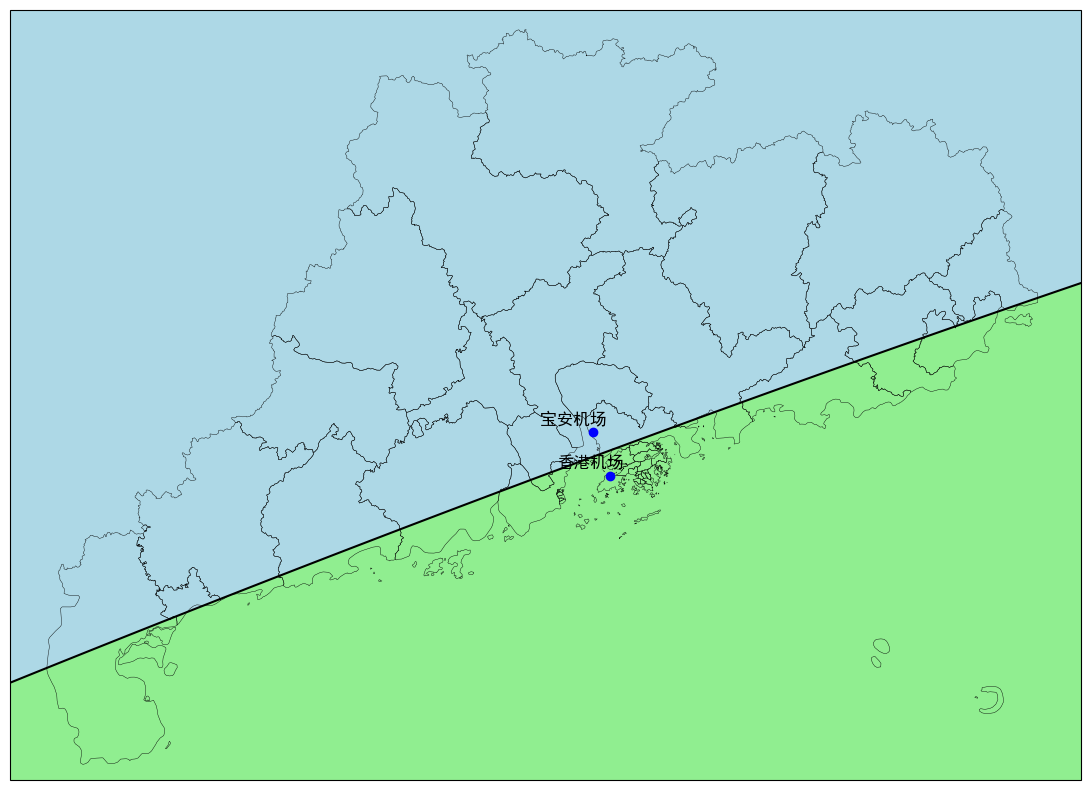

In [18]:
#珠三角两个机场
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

guangdong = gpd.read_file('./chinamap/guangdong.json')
hongkong = gpd.read_file('./chinamap/hongkong.json')
macao = gpd.read_file('./chinamap/macao.json')

guangdong = guangdong.to_crs(ccrs.PlateCarree())
hongkong = hongkong.to_crs(ccrs.PlateCarree())
macao = macao.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})

guangdong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
hongkong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
macao.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

lat1, lon1, name1 = 22.632993696792287, 113.80534005514157, '宝安机场'
lat2, lon2, name2 = 22.315490584010796, 113.93473527373236, '香港机场' 
lats = np.linspace(20.10, 25.66, 300)
lons = np.linspace(109.37, 117.52, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff = np.zeros(lon_grid.shape)

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        d1 = geodesic(point, (lat1, lon1)).kilometers
        d2 = geodesic(point, (lat2, lon2)).kilometers
        distance_diff[i, j] = d1 - d2

contourf = ax.contourf(lon_grid, lat_grid, distance_diff, levels=[-1e10, 0, 1e10], colors=['lightblue', 'lightgreen'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, distance_diff, levels=[0], colors='k', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())

ax.text(lon1+0.1, lat1+0.15, name1, transform=ccrs.PlateCarree(), fontsize=12, ha='right', va='top', zorder=10)
ax.text(lon2+0.1, lat2+0.15, name2, transform=ccrs.PlateCarree(), fontsize=12, ha='right', va='top', zorder=10)

ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 保存图像并显示
plt.savefig('output10.png', dpi=300, bbox_inches='tight')
plt.show()


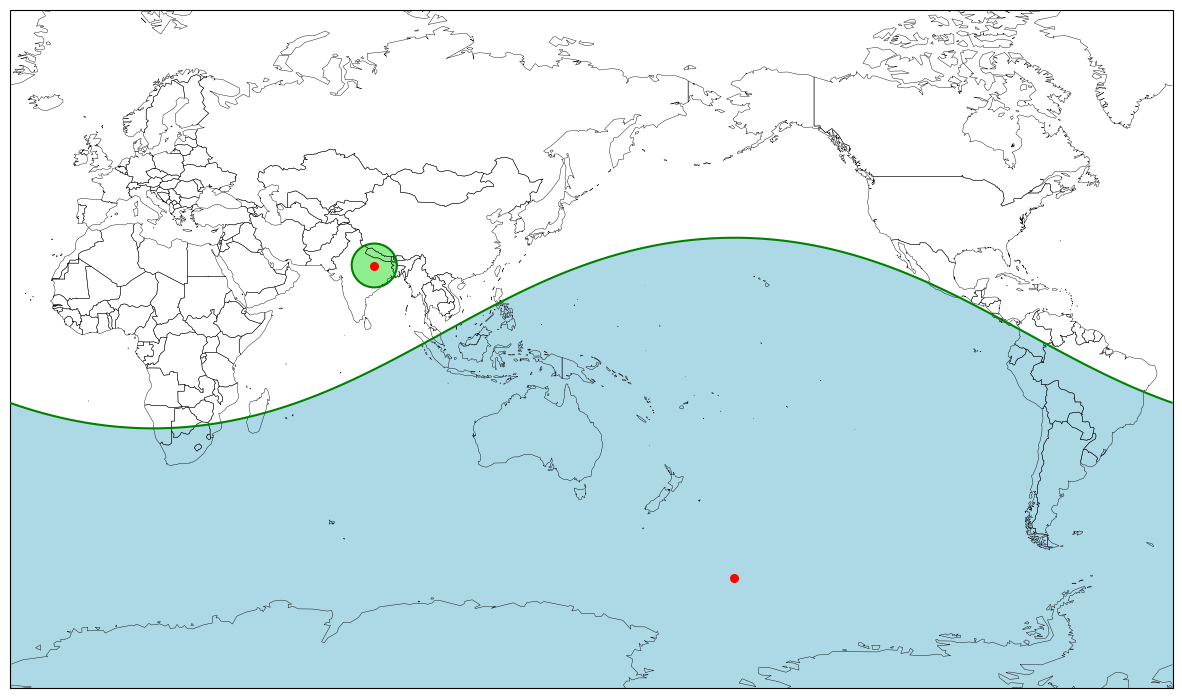

In [1]:
# 十亿人口圈
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import numpy as np
from geopy.distance import geodesic

# 读取世界地图数据
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())

# 创建一个图形和一个轴，使用Miller投影，中心经度为0°
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

# 定义点P1和点P2的经纬度
longitude1, latitude1 = 82.8083, 25.2167
longitude2, latitude2 = -165.658, -61.5917
points = [Point(longitude1, latitude1), Point(longitude2, latitude2)]
gdf = gpd.GeoDataFrame(index=[0, 1], crs=ccrs.PlateCarree(), geometry=points)

# 绘制点P1和点P2
gdf.plot(ax=ax, color='red', markersize=30, transform=ccrs.PlateCarree())

lats = np.linspace(-90, 90, 300)
lons = np.linspace(-180, 180, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff1 = np.zeros(lon_grid.shape)
distance_diff2 = np.zeros(lon_grid.shape)

# 计算每个网格点到目标点的球面距离
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        distance_diff1[i, j] = geodesic(point, (latitude1, longitude1)).kilometers
        distance_diff2[i, j] = geodesic(point, (latitude2, longitude2)).kilometers

# 绘制等高线填充颜色
contourf1 = ax.contourf(lon_grid, lat_grid, distance_diff1, levels=[-1e10, 705, 1e10], colors=['lightgreen', 'none'], transform=ccrs.PlateCarree(), zorder=0)
contour1 = ax.contour(lon_grid, lat_grid, distance_diff1, levels=[705], colors='green', transform=ccrs.PlateCarree(), zorder=3)
contourf2 = ax.contourf(lon_grid, lat_grid, distance_diff2, levels=[-1e10, 10505, 1e10], colors=['lightblue', 'none'], transform=ccrs.PlateCarree(), zorder=0)
contour2 = ax.contour(lon_grid, lat_grid, distance_diff2, levels=[10505], colors='green', transform=ccrs.PlateCarree(), zorder=3)

# 移除刻度参数
ax.set_extent([180, -180, -80, 80], crs=ccrs.PlateCarree())
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 显示绘图
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


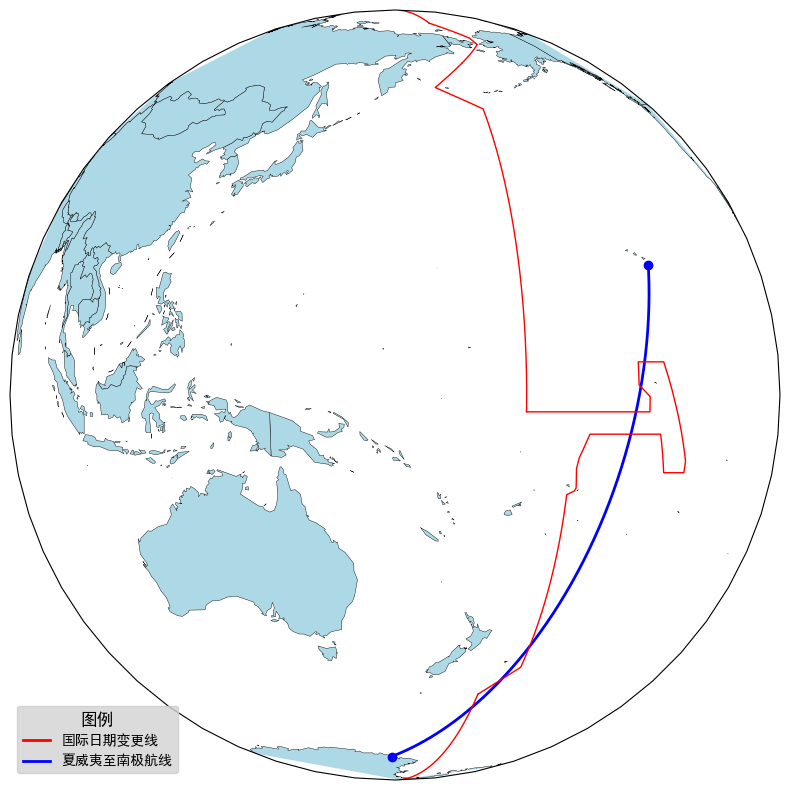

In [23]:
# 国际日期变更线
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyproj import Geod

l1 = '180.000000335276 89.99999550842358,180.00000032410026 89.49999566326517,180.00000031292427 88.99999581810658,180.0000003017485 88.49999597294794,180.00000029057253 87.99999612778953,180.00000027939677 87.49999628263112,180.0000002682208 86.99999643747253,180.00000025704503 86.49999659231406,180.00000024586905 85.99999674715548,180.00000023469318 85.49999690199706,180.00000022351742 84.99999705683842,180.00000021234143 84.49999721168001,180.00000020116568 83.99999736652143,180.0000001899897 83.49999752136296,180.00000017881393 82.99999767620454,180.00000016763795 82.49999783104596,180.00000015646208 81.99999798588732,180.00000014528632 81.4999981407289,180.00000013411034 80.99999829557049,180.00000012293458 80.49999845041191,180.0000001117586 79.99999860525344,180.00000010058284 79.49999876009485,180.00000008940685 78.99999891493644,180.0000000782311 78.4999990697778,180.0000000670551 77.99999922461939,180.00000005587924 77.4999993794608,180.00000004470348 76.99999953430233,180.0000000335275 76.49999968914392,180.00000002235174 75.99999984398534,180.00000001117576 75.4999999988267,180 75.00000015366828'
l2 = '-180.00000000000006 75.00000015366829,-179.6093818493981 74.75190081654415,-179.12602086158938 74.51465868349989,-178.72949210943193 74.29155276784286,-178.324743879806 74.06120394629717,-177.99763309082778 73.87317322657239,-177.6485901317715 73.67106359989562,-177.28734002795892 73.4602869004422,-176.69891496023766 73.11299363213408,-176.29880544561854 72.8743439521546,-175.91761700537137 72.64497170218925,-175.44349150304868 72.35684239546536,-175.0017556248117 72.08543687705702,-174.59485079961186 71.8327082901254,-174.1324848467375 71.542422387828,-173.66035317805796 71.24208593634786,-173.07030049103582 70.86118232947835,-172.7271576519447 70.63616396114291,-172.25929848393008 70.32532936517276,-171.7887537440691 70.00765876813912,-171.4737280283994 69.79191782981833,-171.1367294521689 69.55843584111862,-170.88965684230752 69.38391436159048,-170.44043391528703 69.06286645450777,-170.13041312896718 68.83727841941692,-169.69848365701765 68.51623051233447,-169.3898925456742 68.24811314738008,-168.9999999897555 68.00000014714902,-168.9999999897555 67.58333348009444,-168.9999999897556 67.16666681303968,-168.9999999897556 66.75000014598487,-168.99999998975568 66.33333347893029,-168.99999998975568 65.91666681187553,-168.99999998975568 65.50000014482072,-169.41717540941406 65.308653958994,-169.83435082907243 65.11730777316711,-170.25171145735928 64.88204144702736,-170.63306265953656 64.69291208427448,-171.0602720355138 64.47729321740115,-171.5326071566058 64.23608003702259,-171.8261482975049 64.08430453722318,-172.3313206379905 63.82136263917899,-172.60732418092348 63.67687073575051,-173.17853717453866 63.37425561724952,-173.48339026957868 63.210883329931676,-173.78596469759734 63.048487614194514,-174.42842672610516 62.699729488515835,-174.76025761105566 62.51731405537877,-175.10482461703475 62.32781847828312,-175.4665630066373 62.12660404222174,-175.7621793621451 61.962092421393635,-176.1718104496736 61.73190636177813,-176.3802677916236 61.61410741488279,-176.7450172769327 61.40678940644341,-177.12087526396974 61.19206573018547,-177.38279989995095 61.0418364687216,-177.59272209927147 60.920538140329526,-177.9527107981258 60.7119180364497,-178.20486971830215 60.565228846965184,-178.6270334744469 60.31795278469137,-178.80887924082853 60.210651982286045,-179.0563180650326 60.06477660245177,-179.49264210909453 59.80561891928223,-179.9999710451536 59.50186446727048'
l3 = '179.99967354891336 59.50186446727049,179.61392777462385 59.26939974063383,179.41356783869549 59.14785726934673,178.9379774790021 58.858222414769365,178.69464839353236 58.709539391641464,178.50144998252767 58.59064180171805,178.22556851104224 58.42071834671457,178.0305797188063 58.29978623266521,177.54294497628698 57.99631661403129,177.26934217182253 57.82529451599964,177.03756918338877 57.67941913616562,176.7823584770235 57.518691730211664,176.50143138570536 57.340426726291696,176.0567657927272 57.057180277469996,175.79211489441718 56.88794856066948,175.5907783869084 56.75830868336078,175.2888550066101 56.56376748643279,175.07604378303063 56.42586744117262,174.78046811800544 56.23368629223072,174.26711699053342 55.897786359028146,174.0086510455665 55.72761876112963,173.74896438612393 55.55598630586044,173.48805701220587 55.38288899322052,173.22617306670725 55.20832682320971,172.96298702576792 55.03229979582816,172.69866165131822 54.854848601558615,172.4333597052879 54.675891859435765,172.1669998067121 54.49547025994222,171.89966333655596 54.31362449356052,171.63110615192394 54.13035456029037,171.3615723957116 53.94557907916716,171.09106206791878 53.759420121638165,170.81973793047567 53.57171492577363,170.5473558404869 53.3825448725381,170.2739971789176 53.191950652414484,169.99966194576783 52.999932265402755,170.48737806925226 52.765677157535215,170.79988097500595 52.61512237221129,171.33943677322074 52.3536860220204,171.7344599775247 52.16126073018341,172.06275079049595 52.00073677664204,172.6840130776109 51.69629058642772,172.9670560740199 51.55716982669183,173.3544294676103 51.365843177882915,173.68125542321073 51.204424033726205,174.45356078143985 50.820916235975325,174.8597331779544 50.61831832350836,175.27843824308493 50.40884371949541,175.70894354814644 50.192899328762024,176.15043528348812 49.97060722275524,176.60234378235506 49.742292925335654,177.06409937799188 49.50828196036319,177.53472549881798 49.26881847073308,178.01381524000809 49.024227980305476,178.31282702646087 48.87094693827025,178.75261405028456 48.6449843095202,179.1920327884419 48.418429622040364,179.56044068606343 48.21944192185788,180 48.00000029616075,180.000000335276 48.00000012852257,180.0000003318895 47.50505063227496,180.0000003285029 47.010101136027174,180.00000032511628 46.51515163977956,180.00000032172966 46.02020214353172,180.00000031834304 45.525252647284105,180.00000031495642 45.03030315103649,180.0000003115698 44.53535365478871,180.0000003081832 44.040404158541094,180.00000030479657 43.54545466229331,180.00000030140995 43.05050516604564,180.0000002980231 42.555555669797855,180.00000029463672 42.06060617355024,180.00000029124988 41.56565667730246,180.00000028786326 41.07070718105484,180.00000028447664 40.575757684807,180.00000028109002 40.08080818855939,180.0000002777034 39.585858692311604,180.0000002743169 39.09090919606399,180.0000002709303 38.595959699816206,180.00000026754367 38.10101020356859,180.00000026415705 37.60606070732075,180.0000002607702 37.11111121107314,180.00000025738382 36.61616171482552,180.00000025399697 36.12121221857774,180.00000025061036 35.626262722330125,180.00000024722374 35.131313226082284,180.00000024383712 34.63636372983467,180.0000002404505 34.141414233586886,180.0000002370639 33.64646473733927,180.00000023367727 33.15151524109149,180.00000023029065 32.656565744843874,180.00000022690404 32.16161624859603,180.00000022351742 31.66666675234842,180.00000022013091 31.171717256100806,180.00000021674418 30.67676775985302,180.00000021335768 30.181818263605408,180.00000020997084 29.686868767357566,180.00000020658422 29.191919271109953,180.0000002031976 28.69696977486217,180.00000019981098 28.202020278614555,180.00000019642437 27.70707078236677,180.00000019303775 27.212121286119157,180.00000018965113 26.717171789871315,180.00000018626451 26.2222222936237,180.0000001828779 25.727272797376088,180.00000017949128 25.232323301128304,180.00000017610466 24.73737380488052,180.00000017271805 24.24242430863285,180.00000016933143 23.747474812385065,180.0000001659448 23.25252531613745,180.0000001625582 22.757575819889837,180.00000015917146 22.262626323642053,180.00000015578485 21.76767682739444,180.00000015239823 21.272727331146598,180.0000001490116 20.777777834898984,180.000000145625 20.2828283386512,180.00000014223838 19.787878842403586,180.00000013885176 19.292929346155802,180.00000013546514 18.79797984990813,180.00000013207853 18.303030353660347,180.0000001286919 17.808080857412733,180.0000001253053 17.31313136116512,180.00000012191867 16.818181864917335,180.00000011853206 16.32323236866972,180.00000011514544 15.82828287242188,180.00000011175882 15.333333376174267,180.0000001083722 14.838383879926482,180.00000010498547 14.343434383678868,180.00000010159886 13.848484887431084,180.00000009821213 13.353535391183414,180.00000009482562 12.85858589493563,180.0000000914389 12.363636398688016,180.0000000880524 11.868686902440402,180.00000008466577 11.373737406192618,180.00000008127915 10.878787909945004,180.00000007789254 10.383838413697163,180.00000007450592 9.888888917449549,180.0000000711193 9.393939421201765,180.00000006773269 8.89898992495415,180.00000006434607 8.404040428706367,180.00000006095922 7.909090932458696,180.00000005757283 7.414141436210912,180.000000054186 6.919191939963298,180.00000005079937 6.424242443715684,180.00000004741275 5.9292929474679,180.00000004402614 5.434343451220059,180.00000004063952 4.939393954972445,180.0000000372529 4.444444458724831,180.0000000338664 3.949494962477047,180.00000003047978 3.4545454662294333,180.00000002709317 2.959595969981649,180.00000002370632 2.4646464737339784,180.00000002031993 1.969696977486194,180.0000000169331 1.4747474812385803,180.00000001354647 0.9797979849907961,180.00000001015985 0.4848484887431823,180.00000000677323 -0.0101010075045451,180.00000000338662 -0.5050505037522726,179.9999959436228 -1.016266633357443,179.9999917772833 -1.5409030518859672,179.99998813173622 -1.9999599180984258,179.99998416034828 -2.5000475189551516'
l4 = '-179.99997104515307 -2.5094335128363072,-179.52243587869717 -2.509433512608187,-178.9807967829974 -2.5094335123494447,-178.50686257424397 -2.5094335121230444,-178.03292836550668 -2.5094335118966447,-177.52514171328818 -2.509433511654073,-177.0173550610535 -2.5094335114115016,-176.50956840885115 -2.5094335111689303,-175.90022442618894 -2.509433510877845,-175.42629021745165 -2.5094335106514447,-174.98620845216328 -2.5094335104412164,-174.51227424345836 -2.509433510214816,-173.97063514774243 -2.5094335099560734,-173.46284849566948 -2.5094335097135025,-172.95506184337012 -2.509433509470931,-172.51498007804938 -2.5094335092607025,-172.00719342583085 -2.509433509018131,-171.46555433021973 -2.5094335089821302,-171.02547256495367 -2.509433509112815,-170.5176859127452 -2.509433509263605,-170.00989926051665 -2.509433509414395,-169.53596505175923 -2.5094335095551323,-168.96047351260842 -2.509433509726027,-168.4526868603598 -2.5094335098768172,-167.94490020817142 -2.5094335100276073,-167.3567705984319 -2.509433510202255,-166.73344279716918 -2.5094335103873555,-166.22698895864679 -2.50943351053775,-165.68157713258094 -2.5094335106997123,-165.12642580958004 -2.509433510864568,-164.63945096484676 -2.5094335110091777,-164.07456014498024 -2.5094335111769253,-163.50966932506745 -2.509433511344672,-162.96425749897267 -2.509433511506635,-162.43832466669016 -2.5094335116628135,-161.89291284057802 -2.5094335118247764,-161.38645900207877 -2.5094335119751703,-160.88000516355063 -2.509433512125564,-160.37355132503404 -2.5094335122759586,-159.9060554740841 -2.509433512414784,-159.4969966045188 -2.509433512536256,-159.04897974735795 -2.509433512669297,-158.4865713546375 -2.5094335128363072,-158.48657135463745 -1.932251930971415,-158.48657135463742 -1.445277086243941,-158.48657135463736 -1.0167392228837562,-158.4865713546373 -0.6271593471017605,-158.48657135463728 -0.2280734046349116,-158.94327470606876 0.1380689831919038,-159.33017869792837 0.4482527184222082,-159.63162653355062 0.6899256336613725,-159.9900114000082 0.9772453793003794,-160.2891079468391 1.2170332492692972,-160.639768712542 1.498160527335493,-160.63976871261212 1.9830258206328324,-160.63976871268812 2.5089586529469585,-160.63976871275855 2.9959334976800713,-160.63976871283455 3.5218663299773003,-160.6397687129134 4.067278156074896,-160.63976871297817 4.515295013226993,-160.6397687130392 4.937315428082729,-160.0034504430375 4.937315428082729,-159.47751761073184 4.937315428082729,-158.99054276600435 4.937315428082729,-158.50356792127687 4.937315428082729,-157.9971140827603 4.937315428082729,-157.4906602442437 4.937315428082728,-156.98420640572715 4.937315428082728,-156.47775256721056 4.937315428082728,-156.01999621316673 4.937315428082729,-155.52863393116675 4.937315428082729,-155.34358244032686 4.440358715492633,-155.1566113010309 3.9382467772854404,-154.94815780081225 3.3784438504008,-154.74207633449288 2.8250110325239715,-154.56222129689453 2.3420094213402036,-154.40073059362982 1.9083253226925394,-154.22812571355882 1.4447940461393745,-154.04915072448006 0.9641558096963392,-153.89003205511452 0.5368418200564724,-153.72426372574768 0.0687288740796816,-153.55187136875537 -0.3712904098300092,-153.3649002294594 -0.8734023480371955,-153.17318502236498 -1.3882545042600145,-152.9982081083948 -1.8581558898209662,-152.82397718711445 -2.3260539082484093,-152.6457481907255 -2.8046887775578933,-152.44529084072406 -3.343018002678394,-152.2710599194437 -3.8109160211058204,-152.11993740029536 -4.216756308981527,-151.95282258071265 -4.665544000385537,-151.80644412936277 -5.058644070245614,-151.65206952779567 -5.473217841869862,-151.47472057992624 -5.949489336438642,-151.30523372644433 -6.404647136850451,-151.13100280516397 -6.872545155277875,-150.97574815507735 -7.289482301642839,-150.81513750033213 -7.7208030255497775,-150.6019399323151 -8.293346170450048,-150.38474428918946 -8.876626166232372,-150.17466474776148 -9.440795834991272,-150.00023316037058 -9.90923274327129,-150.00016801218877 -10.50025628547553,-150.00019926131836 -11.000177884848654,-150.00023316120186 -11.645359271235485,-150.62431493358625 -11.645359271235485,-151.15024776589192 -11.645359271235485,-151.59826462304122 -11.645359271235485,-152.10471846155778 -11.645359271235485,-152.61117230007437 -11.645359271235485,-153.11762613859096 -11.645359271235485,-153.64355897089663 -11.645359271235485,-154.0915758280459 -11.645359271235485,-154.56615865556606 -11.645359271235485,-154.69737191344396 -11.142520356713785,-154.81676110369585 -10.684993946633012,-154.92187359344564 -10.282179085518584,-155.03753735129658 -9.838929375939893,-155.1567181985145 -9.38220138353979,-155.26658958843166 -8.961149339436588,-155.39425476821796 -8.471907463545627,-155.50991852606887 -8.028657753966943,-155.62206519455276 -7.598886327209675,-155.74000423097038 -7.146917234976939,-155.86539413218998 -6.666394741740031,-155.97629898987353 -6.241382215150122,-156.08043825517493 -5.842296970487039,-156.5387116600836 -5.842296970543612,-157.06332167659238 -5.842296970608372,-157.71283883987974 -5.842296970688552,-158.3123931444673 -5.842296970762565,-158.9119474490457 -5.8422969708365775,-159.5614646123484 -5.842296970916758,-160.21098177564807 -5.842296970996939,-160.8604989389416 -5.842296971077118,-161.48503467288367 -5.842296971154215,-162.13455183618024 -5.842296971234395,-162.73410614074317 -5.842296971308407,-163.30867901598248 -5.842296971379337,-163.9332147499215 -5.842296971456433,-164.632694771927 -5.84229697154278,-165.3321747939449 -5.842296971629128,-165.93172909851705 -5.84229697170314,-166.55626483245612 -5.842296971780238,-167.08087484895873 -5.842296971844998,-167.6804291535401 -5.84229697191901,-168.2799834581278 -5.842296971993024,-168.8795377627154 -5.842296972067036,-169.3960784865953 -5.842296972130801,-169.62507785291177 -6.35660891369496,-169.84589895245523 -6.8525532050322955,-170.07078561618377 -7.357628387180476,-170.32250417147964 -7.9229655799612555,-170.5494912380281 -8.432758077575215,-170.76306235879287 -8.912419569872858,-170.99278789473252 -9.428362422975272,-171.10019629681767 -10.009622299589058,-171.18151071292272 -10.449669880174843,-171.29378558833838 -11.057265552059103,-171.24930411675018 -11.50294873519149,-171.19851260561944 -12.011855512521727,-171.1518074190982 -12.479819261344975,-171.10374265244792 -12.961405356236922,-171.0570374659267 -13.429369105060173,-171.00328719125883 -13.967921285392412,-171.23670082511237 -14.430983758804853,-171.61975036496315 -14.603559135697955,-172.01754249584656 -14.782776494734737,-172.49998268803537 -15.000130359793022,-172.49998268803571 -15.531222537643785,-172.49998268803571 -16.06255885838963,-172.49998268803571 -16.39438269732112,-172.50000834762596 -16.85032831923978,-172.49998268803571 -17.285565042578842,-172.49998268803571 -17.656323677732257,-172.49998268803571 -18.187497236548083,-172.49998268803571 -18.718833557293937,-172.49998268803571 -19.24992573514479,-172.49998268803571 -19.78126205589066,-172.49998268803571 -20.31259837663658,-172.49998268803571 -20.663767886230215,-172.49998268803571 -21.11972164426905,-172.49998268803571 -21.59640057312783,-172.50002337851834 -22.00060235349548,-172.49998268803571 -22.437455373830048,-172.49998268803571 -22.968873075540913,-172.49998268803571 -23.499965253391768,-172.49998268803571 -24.00005128356237,-172.4999826880357 -24.4668367316905,-172.49998268803571 -24.999979201008337,-172.49998268803571 -25.440919760228013,-172.49998268803571 -26.000151261349433,-172.4999826880357 -26.37355244712563,-172.49998268803571 -27.000079178795485,-172.4999826880357 -27.389085817303034,-172.49998268803571 -27.999925715276312,-172.4999826880357 -28.425344358300386,-172.49998268803571 -28.819122603879382,-172.49998268803571 -29.23634671712846,-172.49998268803571 -29.83465597405679,-172.49998268803571 -30.35278524455547,-172.49998268803571 -30.937534410323924,-172.49998268803574 -31.316505687683012,-172.49998268803571 -31.875043127584203,-172.49998268803571 -32.29058871622052,-172.49998268803571 -32.81247046387958,-172.49998268803571 -33.28539691557798,-172.49998268803571 -33.75006056210494,-172.49998268803574 -34.218029602475596,-172.49998268803571 -34.68756927936531,-172.49998268803571 -35.1921126310131,-172.49998268803571 -35.62491523469564,-172.49998268803571 -36.20764600119051,-172.49998268803571 -36.56250533292097,-172.49998268803571 -37.181729029728025,-172.49998268803571 -37.68949571481673,-172.49998268803571 -38.16617464367551,-172.49998268803571 -38.62212840171434,-172.49998268803574 -39.14025767221302,-172.49998268803571 -39.679112113531644,-172.49998268803571 -40.11434070075053,-172.49998268803571 -40.63246997124921,-172.49998268803571 -41.24996753825775,-172.49998268803571 -41.62727817060667,-172.49998268803571 -42.18747625551806,-172.49998268803571 -42.60136119914418,-172.49998268803571 -43.12506635374355,-172.49998268803571 -43.57544422768169,-172.49998268803571 -44.06241230907372,-172.49998268803571 -44.547170091351106,-172.49998268803571 -45.000002407299114,-172.86689700070133 -45.293814163530286,-173.23785131828305 -45.59088902920324,-173.5714028935483 -45.85794075848945,-173.90624576392617 -46.12590805862702,-174.3749594320739 -46.50131845035642,-174.7081874738896 -46.768109133257866,-175.16252364519994 -47.13190631769315,-175.5811187084202 -47.46713012276399,-176.05762649442528 -47.84865401319251,-176.37586513614897 -48.10343253146634,-176.71873122522487 -48.37796350417781,-177.04631862336407 -48.640283684786894,-177.45303057494647 -48.96597314146773,-177.8240200561051 -49.26299691201707,-178.22907111596393 -49.587228227563244,-178.59374865974553 -49.879198166270044,-178.93694852025067 -50.154079832475546,-179.318148001907 -50.45933465670629,-179.69421442579434 -50.76044895305493,-179.9999710451536 -51.00526657952802'
l5 = '180.00125809707686 -51.003774291230535,180.0033129137219 -51.49551639693058,180 -51.999999906277594,180 -52.49999984841105,180 -52.99999979054451,180 -53.49999973267808,180 -53.99999967481159,180 -54.49999961694505,180 -54.99999955907856,180 -55.49999950121202,180 -55.99999944334559,180 -56.49999938547904,180 -56.99999932761256,180 -57.49999926974601,180 -57.99999921187958,180 -58.49999915401304,180 -58.99999909614655,180 -59.49999903828001,180 -59.99999898041358,180 -60.499998922547036,180 -60.999998864680606,180 -61.499998806814006,180 -61.999998748947576,180 -62.49999869108103,180 -62.9999986332146,180 -63.499998575348,180 -63.99999851748157,180 -64.49999845961503,180 -64.9999984017486,180 -65.49999834388211,180 -65.99999828601557,180 -66.49999822814902,180 -66.99999817028254,180 -67.499998112416,180 -67.99999805454956,180 -68.49999799668308,180 -68.99999793881653,180 -69.4999978809501,180 -69.99999782308356,180 -70.49999776521707,180 -70.99999770735053,180 -71.49999764948399,180 -71.99999759161756,180 -72.49999753375107,180 -72.99999747588453,180 -73.4999974180181,180 -73.99999736015155,180 -74.49999730228507,180 -74.99999724441852,180 -75.4999971865521,180 -75.9999971286855,180 -76.49999707081906,180 -76.99999701295252,180 -77.49999695508609,180 -77.99999689721955,180 -78.49999683935306,180 -78.99999678148652,180 -79.49999672362009,180 -79.9999966657536,180 -80.49999660788706,180 -80.99999655002051,180 -81.49999649215408,180 -81.9999964342876,180 -82.49999637642105,180 -82.99999631855451,180 -83.49999626068808,180 -83.99999620282159,180 -84.49999614495505,180 -84.9999960870885,180 -85.49999602922207,180 -85.99999597135559,180 -86.49999591348904,180 -86.99999585562261,180 -87.49999579775601,180 -87.99999573988958,180 -88.49999568202304,180 -88.99999562415655,180 -89.49999556629001,180 -89.99999550842358'


def processing(lineData):
    b = lineData.split(',')
    result = []
    for i in range(0, len(b)):
        c = b[i].split(' ')
        result.append((float(c[0]), float(c[1])))
    return result


line = [l1, l2, l3, l4, l5]

lat1, lon1 = 19.692293863634962, -155.67284248718298
lat2, lon2 = -69.8834980224172, 158.5236171621716
geod = Geod(ellps="WGS84")
num_points = 200
point = geod.npts(lon2, lat2, lon1, lat1, num_points)
lonP, latP = zip(*point)

# world = gpd.read_file('./worldmap1/World_countries.shp')
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Orthographic(central_longitude=160, central_latitude=0)})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
ax.plot(lonP, latP, color='blue', linewidth=2, transform=ccrs.Geodetic())
# point
ax.scatter([lon1, lon2], [lat1, lat2], color='b', marker='o', zorder=5, transform=ccrs.PlateCarree())


for j in range(0, len(line)):
    result = processing(line[j])
    lons, lats = zip(*result)
    ax.plot(lons, lats, color='r', linewidth=1, transform=ccrs.PlateCarree())


legend_elements = [
    Line2D([0], [0], color='red', linewidth=2, label='国际日期变更线', linestyle='-'),
    Line2D([0], [0], color='blue', linewidth=2, label='夏威夷至南极航线', linestyle='-')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')

plt.savefig('output11.png', dpi=300, bbox_inches='tight')
plt.show()


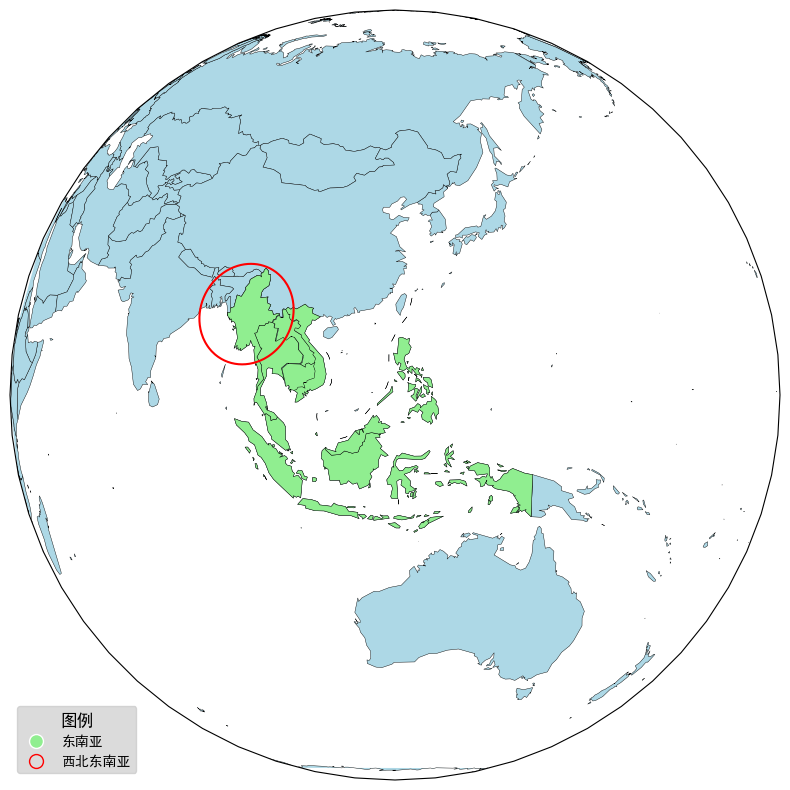

In [9]:
#西北东南亚
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
import numpy as np
from geopy.distance import geodesic

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
countries_to_fill1 = ['印度尼西亚', '马来西亚', '新加坡', '东帝汶', '菲律宾', '文莱', '泰国', '缅甸', '老挝', '越南', '柬埔寨']

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Orthographic(central_longitude=120, central_latitude=10)})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill1:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


# 定义点P1和点P2的经纬度
longitude1, latitude1 = 95.30036384230752, 21.377880256552466

lats = np.linspace(-90, 90, 300)
lons = np.linspace(-180, 180, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff1 = np.zeros(lon_grid.shape)

# 计算每个网格点到目标点的球面距离
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        distance_diff1[i, j] = geodesic(point, (latitude1, longitude1)).kilometers

# 绘制等高线填充颜色
# contourf1 = ax.contourf(lon_grid, lat_grid, distance_diff1, levels=[-1e10, 705, 1e10], colors=['none', 'none'], transform=ccrs.PlateCarree(), zorder=0)
contour1 = ax.contour(lon_grid, lat_grid, distance_diff1, levels=[850], colors='red', transform=ccrs.PlateCarree(), zorder=3)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='东南亚', linestyle='None'),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='none', markersize=10, label='西北东南亚', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


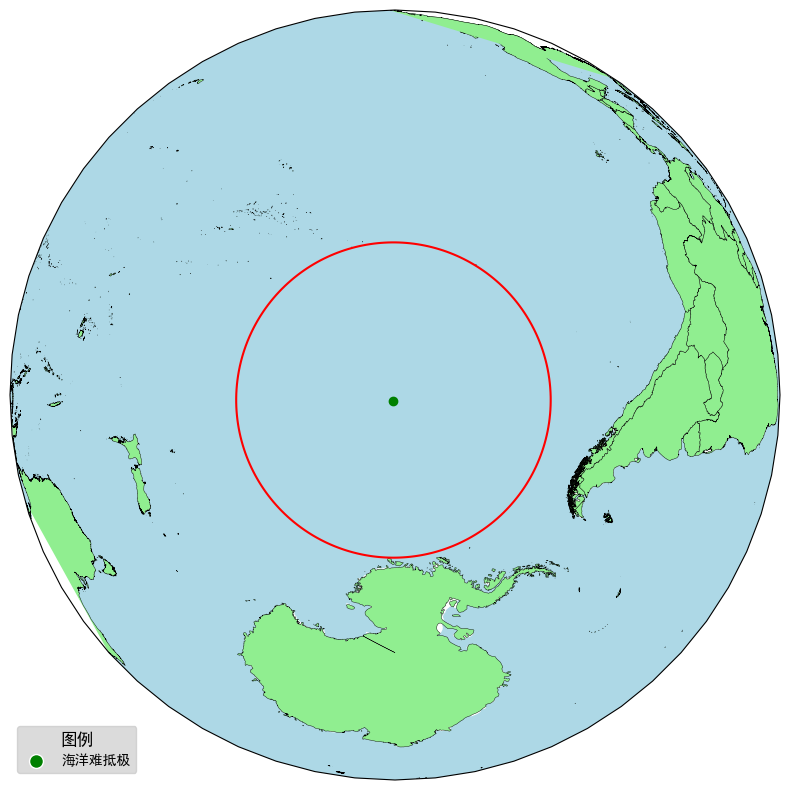

In [15]:
#陆地/海洋难抵极
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
import numpy as np
from geopy.distance import geodesic

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap1/World_countries.shp')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Orthographic(central_longitude=-123, central_latitude=-48)})
ax.add_feature(cfeature.OCEAN, color='lightblue')
world.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

longitude1, latitude1 = -123.385000, -48.868333

lats = np.linspace(-90, 90, 300)
lons = np.linspace(-180, 180, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff1 = np.zeros(lon_grid.shape)

# 计算每个网格点到目标点的球面距离
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = (lat_grid[i, j], lon_grid[i, j])
        distance_diff1[i, j] = geodesic(point, (latitude1, longitude1)).kilometers

contour1 = ax.contour(lon_grid, lat_grid, distance_diff1, levels=[2688], colors='red', transform=ccrs.PlateCarree(), zorder=3)
ax.scatter([longitude1], [latitude1], color='green', marker='o', zorder=15, transform=ccrs.PlateCarree())


legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='海洋难抵极', linestyle='None'),
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


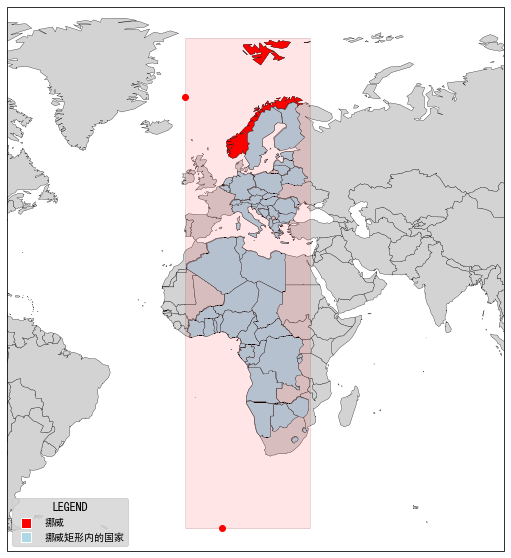

In [3]:
# 挪威的布韦岛
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')

world = world.to_crs(ccrs.PlateCarree())

countries_to_fill1 = ['挪威']
countries_to_fill2 = ['瑞典', '芬兰', '爱沙尼亚', '拉脱维亚', '立陶宛', '白俄罗斯', '比利时', '荷兰', '卢森堡', '德国', '波兰', '捷克', '斯洛伐克', '瑞士', '意大利', '列支敦士登',
                      '奥地利', '匈牙利', '罗马尼亚', '摩尔多瓦', '斯洛文尼亚', '克罗地亚', '波黑', '黑山', '塞尔维亚', '北马其顿', '阿尔巴尼亚', '希腊', '保加利亚', '阿尔及利亚',
                      '突尼斯', '利比亚', '乍得', '尼日尔', '布基纳法索', '科特迪瓦', '加纳', '多哥', '贝宁', '尼日利亚', '喀麦隆', '中非', '尼日利亚', '喀麦隆', '中非',
                      '刚果（金）', '刚果（布）', '喀麦隆', '加蓬', '赤道几内亚', '中非', '安哥拉', '纳米比亚', '博茨瓦纳', '津巴布韦', '斯威士兰', '莱索托', '卢旺达', '布隆迪']
# 矩形区域
coords = [(-9.077461, 80.828928), (33.516317, 80.828928), (33.516317, -54.450000), (-9.077461, -54.450000)]
# 特殊点位
# 布韦岛
lon1, lat1 = 3.516667, -54.450000
# 扬马延岛
lon2, lat2 = -9.077461, 70.863625

polygon = Polygon(coords)
gdf = gpd.GeoDataFrame(index=[0], crs=ccrs.PlateCarree(), geometry=[polygon])


fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill1:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill2:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

gdf.plot(ax=ax, color='red', alpha=0.1, edgecolor='black', transform=ccrs.PlateCarree())
ax.scatter([lon1, lon2], [lat1, lat2], color='red', marker='o', zorder=15, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='挪威', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='lightblue', markersize=10, label='挪威矩形内的国家', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='LEGEND', title_fontsize='large')
legend.get_frame().set_facecolor('lightgray')


ax.tick_params(axis='both', which='both', length=0, labelsize=0)

ax.set_extent([-70, 100, -60, 85], crs=ccrs.PlateCarree())


plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()
